In [74]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch
import csv

In [10]:
G = nx.read_gexf('TagNetwork.gexf')

In [13]:
print('Nodos: ', nx.number_of_nodes(G))
print('Aristas: ', nx.number_of_edges(G))

Nodos:  306
Aristas:  2609


In [15]:
df = pd.read_csv('Tags.csv')

df = df.drop(columns=['Label', 'timeset'])

In [16]:
df.head(10)

,Id,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,pageranks,clustering,triangles,eigencentrality,componentnumber
0,Indie,262,30977,2,0.816425,0.887574,13878.511313,1,0.166612,0.080957,2768,1.000000,0
1,Action,220,19968,3,0.739606,0.824951,8318.597583,1,0.109784,0.100291,2416,0.907028,0
2,Casual,170,15378,2,0.667984,0.751479,3674.484782,1,0.078828,0.143195,2057,0.809113,0
3,Adventure,189,15169,2,0.694045,0.779586,5180.851061,1,0.079351,0.125127,2223,0.851144,0
4,Strategy,160,7989,2,0.655039,0.736686,3863.857113,0,0.047571,0.140959,1793,0.749983,0
5,Simulation,165,6209,2,0.661448,0.744083,3839.252450,0,0.037651,0.140946,1907,0.775004,0
6,Early Access,138,5867,2,0.628253,0.704142,2542.575487,0,0.031945,0.173490,1640,0.701784,0
7,RPG,149,5448,2,0.641366,0.720414,3777.763527,0,0.033157,0.162706,1794,0.737261,0
8,Free to Play,125,3295,2,0.613430,0.684911,1277.028746,0,0.018361,0.212516,1647,0.698252,0
9,Puzzle,95,2179,3,0.580756,0.640039,753.298781,1,0.012198,0.265622,1186,0.581092,0


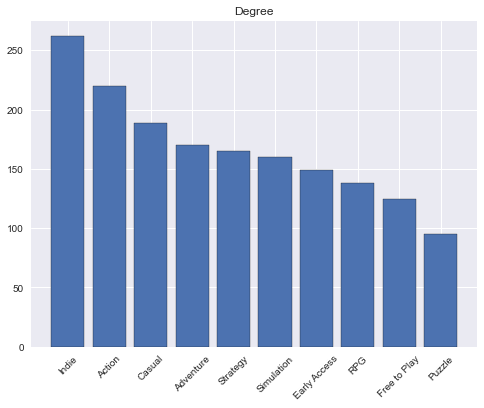

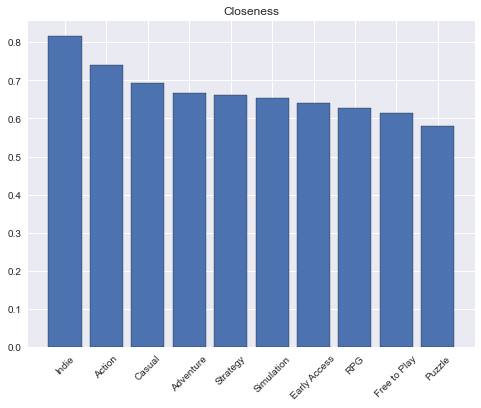

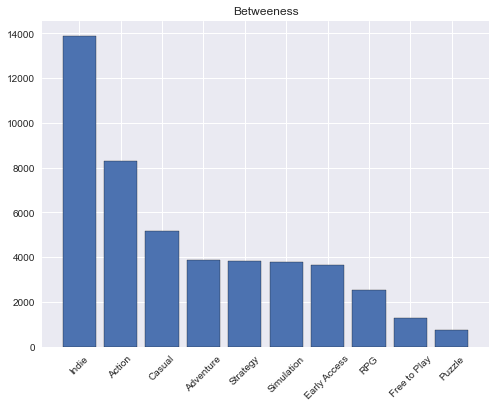

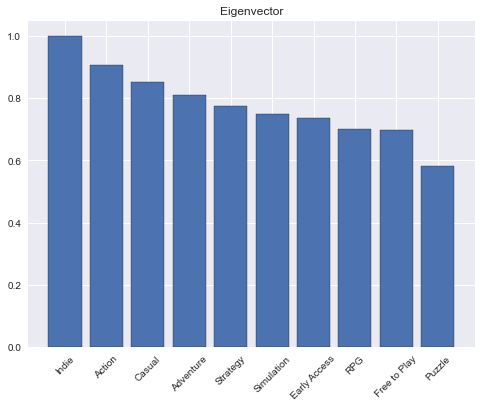

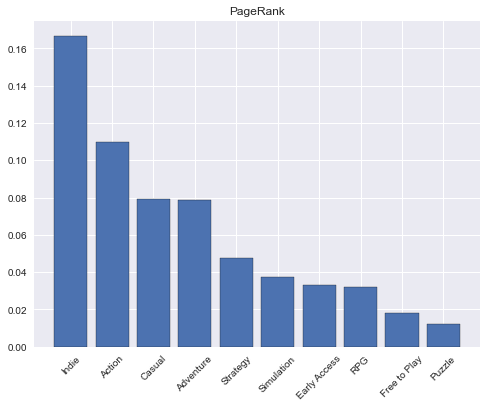

In [29]:
plt.title('Degree')
plt.xticks(rotation=45)
plt.bar(df.Id[0:10],sorted(df.Degree[0:10], reverse = True))
plt.show()

plt.title('Closeness')
plt.xticks(rotation=45)
plt.bar(df.Id[0:10], sorted(df.closnesscentrality[0:10], reverse = True))
plt.show()

plt.title('Betweeness')
plt.xticks(rotation=45)
plt.bar(df.Id[0:10], sorted(df.betweenesscentrality[0:10], reverse = True))
plt.show()

plt.title('Eigenvector')
plt.xticks(rotation=45)
plt.bar(df.Id[0:10], sorted(df.eigencentrality[0:10], reverse = True))
plt.show()

plt.title('PageRank')
plt.xticks(rotation=45)
plt.bar(df.Id[0:10], sorted(df.pageranks[0:10], reverse = True))
plt.show()

# Niguel cosos

In [77]:
def color_graph_dic(dicc, name):
    
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.rcParams["patch.force_edgecolor"] = True
    colors = sns.color_palette('husl', n_colors=len(dicc))
    index = []
    for i in range(0, len(dicc)): 
        index.append(i)
        
    plt.bar(index ,dicc.values(), color=colors)
    plt.title(name)

    cmap = dict(zip(dicc.keys(), colors))

    patches = [Patch(color=v, label=k) for k, v in cmap.items()]

    plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
    
def color_graph_list(Id, value, name):
    
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.rcParams["patch.force_edgecolor"] = True
    colors = sns.color_palette('husl', n_colors=len(Id))
    index = []
    for i in range(0, len(Id)): 
        index.append(i)
        
    plt.bar(index ,value, color=colors)
    plt.title(name)

    cmap = dict(zip(Id, colors))

    patches = [Patch(color=v, label=k) for k, v in cmap.items()]

    plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)

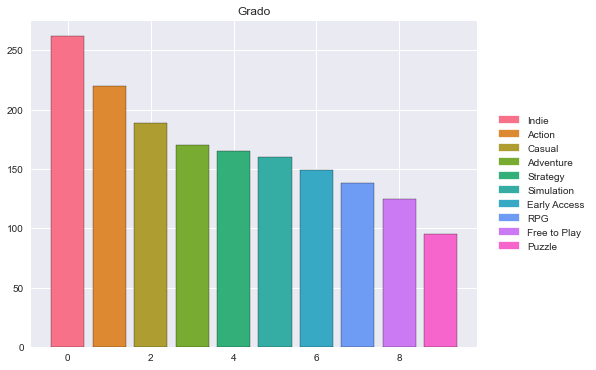

In [78]:
color_graph_list(df.Id[0:10],sorted(df.Degree[0:10], reverse = True), "Grado")

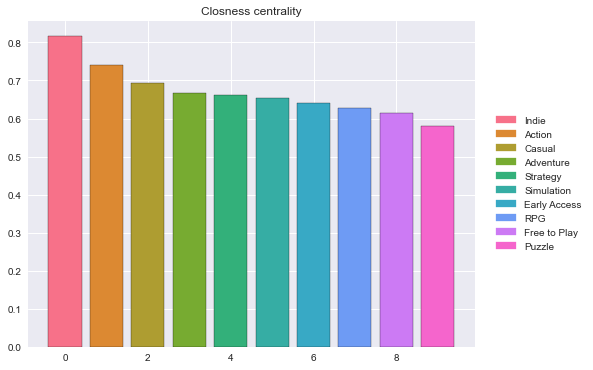

In [65]:
color_graph_list(df.Id[0:10],sorted(df.closnesscentrality[0:10], reverse = True), "Closness centrality")

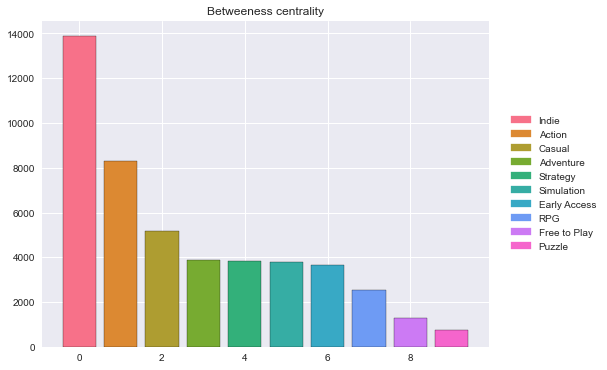

In [66]:
color_graph_list(df.Id[0:10],sorted(df.betweenesscentrality[0:10], reverse = True), "Betweeness centrality")

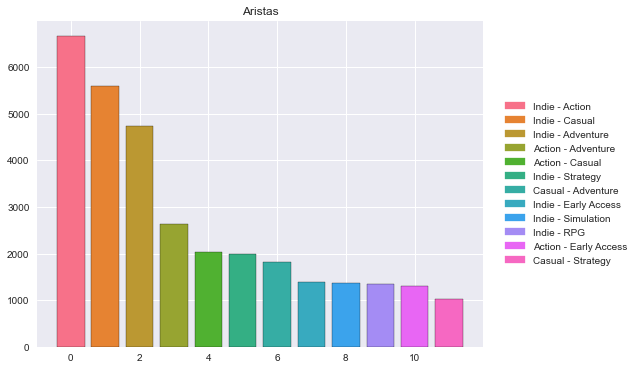

In [79]:
lista =[]
 
with open('aristas.csv', newline='') as File:  
    next(File)
    reader = csv.reader(File)
    for row in reader:
        lista.append([row[0], row[1], int(row[6])])
lista.sort(key=lambda x: x[2], reverse = True)
aristas = {}
for e in lista[:12]:
    key = e[0] + " - " + e[1]
    aristas[key] = e[2]
color_graph_dic(aristas, "Aristas")